In [1]:
import numba
import jax
import numpy

In [2]:
def outer_index(a, b):
    return numpy.multiply.outer(a, b)[5]

In [3]:
N = 10000
a = numpy.random.random(N)
b = numpy.random.random(N)

In [4]:
outer_index(a, b)

array([0.51660971, 0.76698747, 0.52619606, ..., 0.7702483 , 0.50157954,
       0.07134418])

In [5]:
# %timeit str(log_likelihood(a, b, c))

In [6]:
# n_fn = numba.njit(log_likelihood)

In [7]:
# n_fn(a, b, c)

In [8]:
# %timeit str(n_fn(a, b, c))

In [9]:
# j_fn = jax.jit(log_likelihood)

In [10]:
# import jax.numpy as numpy
# str(j_fn(a, b, c))

In [11]:
# %timeit str(j_fn(a, b, c))

In [12]:
from uarray import *
import numpy

In [13]:
jitted = jit(1, 1)(outer_index)

In [14]:
jitted

<function _ast.fn>

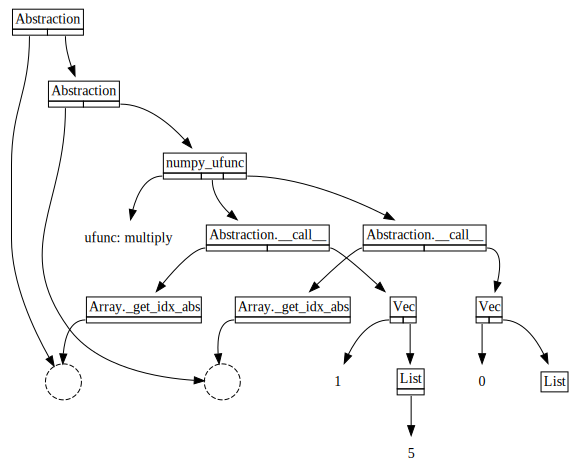

In [15]:
display_ops(jitted.res)

In [16]:
print(jitted.source)



def fn(a, b):
    return numpy.multiply(a[(5,)], b)



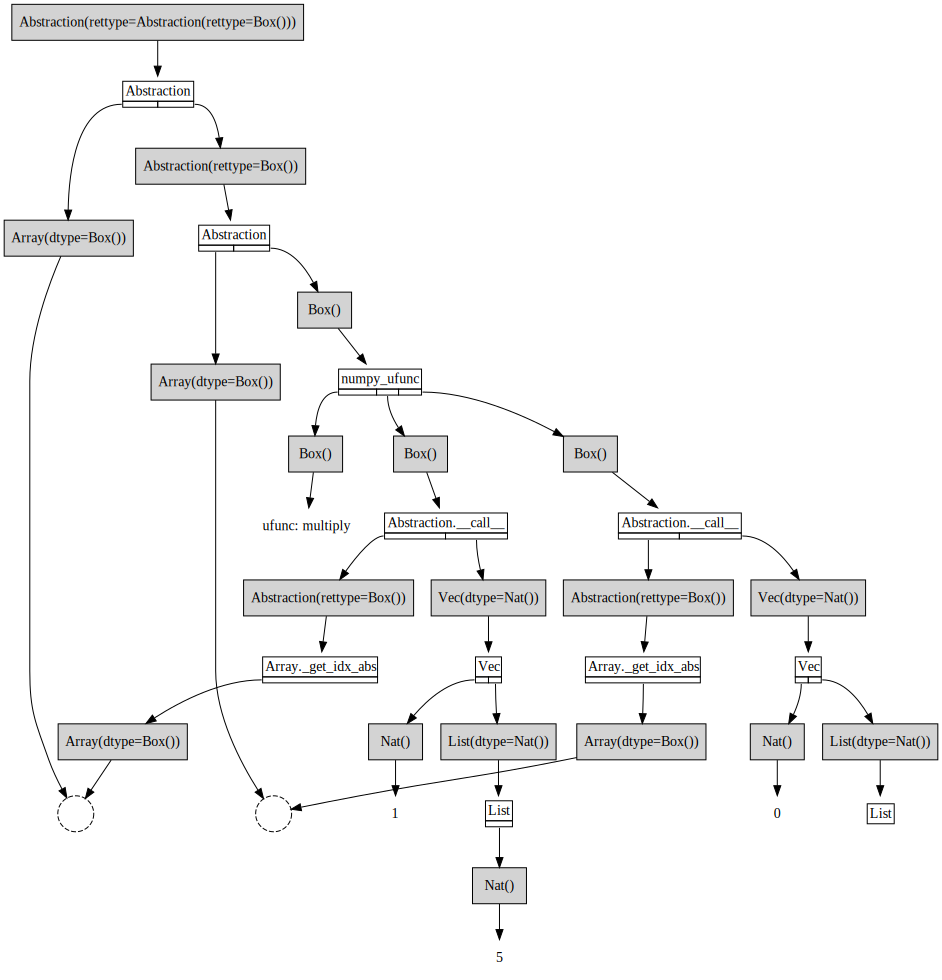

In [17]:
jitted.res

In [18]:
jitted(a, b, c)

NameError: name 'c' is not defined

In [ ]:

def fn(data, mean, sigma):
    v3 = 0
    for v2 in range(data.shape[0]):
        v3 = numpy.add(v3, numpy.log(numpy.exp(numpy.negative(numpy.true_divide(numpy.power(numpy.subtract(data[(v2,)], mean), 2), numpy.multiply(2, numpy.power(sigma, 2)))))))
    return v3

In [ ]:
numba.njit(fn)(a, b, c)

In [ ]:
def wrapped_log_likelihood(data, mean, sigma):
    return log_likelihood(
        LazyNDArray.create(to_array(data)).with_dim(Nat(1)),
        LazyNDArray.create(to_array(mean)).with_dim(Nat(0)),
        LazyNDArray.create(to_array(sigma).with_dim(Nat(0)))
    ).array.to_value()

res = Abstraction.create_nary(wrapped_log_likelihood, Box(None), Box(None), Box(None))
replaced = replace(res)

In [ ]:
import ast

In [ ]:
data = Box(AST(ast.Name("data", ast.Load())))
mean = Box(AST(ast.Name("mean", ast.Load())))
sigma = Box(AST(ast.Name("sigma", ast.Load())))
with includecontext(ast_replace_ctx):
    replaced_ast = replace(replaced(data)(mean)(sigma))
replaced_ast

In [ ]:
import numpy
isinstance(numpy.power, numpy.ufunc)

In [ ]:
import functools

In [ ]:
def f(a, b, c):
    return a + b + c

In [ ]:
functools.partial(functools.partial(functools.partial(f, 1), 2), 3)()